In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import copy
import networkx as nx
import random
from random import sample

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


#### Load data

In [2]:
FlightsNx = pd.read_pickle("Data/FlightsNx18.pkl")
degrees = pd.read_pickle("Data/Degrees18.pkl")

#### Implement as network. 


In [3]:
Network = nx.from_pandas_edgelist(FlightsNx, source = "Origin", target = "Dest", edge_attr = True)
print(nx.info(Network))

Name: 
Type: Graph
Number of nodes: 355
Number of edges: 3110
Average degree:  17.5211


## Attacks and Errors
### Analysis of how removing certain airports affect network characteristics

#### Measures for entire network

In [4]:
print(nx.info(Network))
print("The average shortest path is: {}".format(nx.average_shortest_path_length(Network)))
print("The average clustering coefficient is: {}".format(nx.average_clustering(Network)))
print("The diameter of the network is: {}".format(nx.diameter(Network)))
print("The global efficiency of the network is: {}".format(nx.global_efficiency(Network)))

Name: 
Type: Graph
Number of nodes: 355
Number of edges: 3110
Average degree:  17.5211
The average shortest path is: 2.387602450863372
The average clustering coefficient is: 0.5677439768425595
The diameter of the network is: 6
The global efficiency of the network is: 0.45555396408625337


In [5]:
# What happens to network characteristics as the most important airports are removed? 
degrees.sort_values(by = "degree_unnormalized", inplace = True, ascending = False)
average_clustering = list()
average_shortest_path_length = list()
global_efficiency = list()
average_degree = list()
for i in range(30):
    net = Network.subgraph(nodes = list(degrees["airport"])[i:])
    average_clustering.append(nx.average_clustering(net))
    
    #average_shortest_path_length.append(nx.average_shortest_path_length(net))
    
    global_efficiency.append(nx.global_efficiency(net))
    
    average_degree.append(sum(dict(net.degree()).values())/len(dict(net.degree()).values()))
    if i%5 == 0:
        print(i)
    
measures_attacks = pd.DataFrame({"average_degree":average_degree,
                                "average_clustering":average_clustering,
                                "global_efficiency":global_efficiency})
#measures_attacks.head()

0
5
10
15
20
25


In [15]:
measures_attacks.to_pickle("Data/measures_attacks.pkl")

In [7]:
## What happens to network characteristics if nodes are randomly removed? 
random.seed(a = 12345)
degrees.sort_values(by = "degree_unnormalized", inplace = True, ascending = False)
average_clustering = list()
#average_shortest_path_length = list()
#global_efficiency = list()
average_degree = list()
for i in range(300):
    net = Network.subgraph(nodes = sample(list(degrees["airport"]), len(list(degrees["airport"]))-i))
    average_clustering.append(nx.average_clustering(net))
    
    #average_shortest_path_length.append(nx.average_shortest_path_length(net))
    
    #global_efficiency.append(nx.global_efficiency(net))
    
    average_degree.append(sum(dict(net.degree()).values())/len(dict(net.degree()).values()))
    if i%5 == 0:
        print(i)
    
measures_random = pd.DataFrame({"average_degree":average_degree,
                                "average_clustering":average_clustering})
measures_random.head()

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295


,average_degree,average_clustering
0,17.521127,0.567744
1,16.824859,0.548080
2,17.308782,0.565937
3,17.511364,0.565317
4,17.236467,0.576130


In [8]:
measures_random.to_pickle("Data/measures_random.pkl")

In [9]:
# What happens to network characteristics as the least important nodes are removed?
degrees.sort_values(by = "degree_unnormalized", inplace = True, ascending = False)
average_clustering = list()
average_shortest_path_length = list()
global_efficiency = list()
average_degree = list()
for i in range(30):
    net = Network.subgraph(nodes = list(degrees["airport"])[:len(degrees["airport"])-i])
    average_clustering.append(nx.average_clustering(net))
    
    #average_shortest_path_length.append(nx.average_shortest_path_length(net))
    
    global_efficiency.append(nx.global_efficiency(net))
    
    average_degree.append(sum(dict(net.degree()).values())/len(dict(net.degree()).values()))
    if i%5 == 0:
        print(i)
    
measures_errors = pd.DataFrame({"average_degree":average_degree,
                                "average_clustering":average_clustering,
                                "global_efficiency":global_efficiency})
measures_errors.head()

0
5
10
15
20
25


,average_degree,average_clustering,global_efficiency
0,17.521127,0.567744,0.455554
1,17.564972,0.569353,0.455820
2,17.609065,0.570968,0.456597
3,17.653409,0.572603,0.456998
4,17.698006,0.574239,0.457242


In [10]:
measures_errors.to_pickle("Data/measures_errors.pkl")

#### Mapping airport network geographically

In [11]:
attack_effect = pd.read_pickle("Data/measures_attacks.pkl")
error_effect = pd.read_pickle("Data/measures_errors.pkl")
random_effect = pd.read_pickle("Data/measures_random.pkl")
plist = list(range(1,31))
plist = [(x-1) * 1/310 for x in plist]
plist2 = list(range(1,301))
plist2 = [(x-1) * 1/310 for x in plist2]

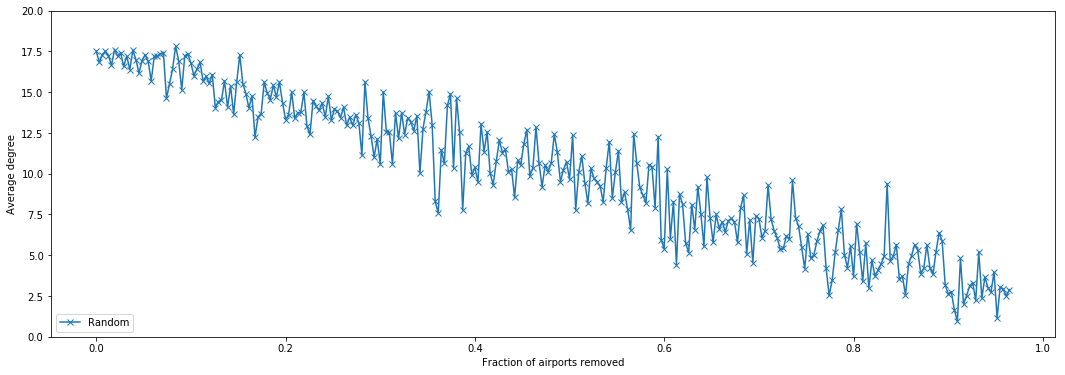

In [13]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(plist2, random_effect["average_degree"], label = "Random", marker = "x")
#plt.title("Effect of attacks and errors on network average degree")
plt.legend(loc = "lower left")
plt.xlabel("Fraction of airports removed")
plt.ylabel("Average degree")
plt.ylim(0,20)
plt.show()

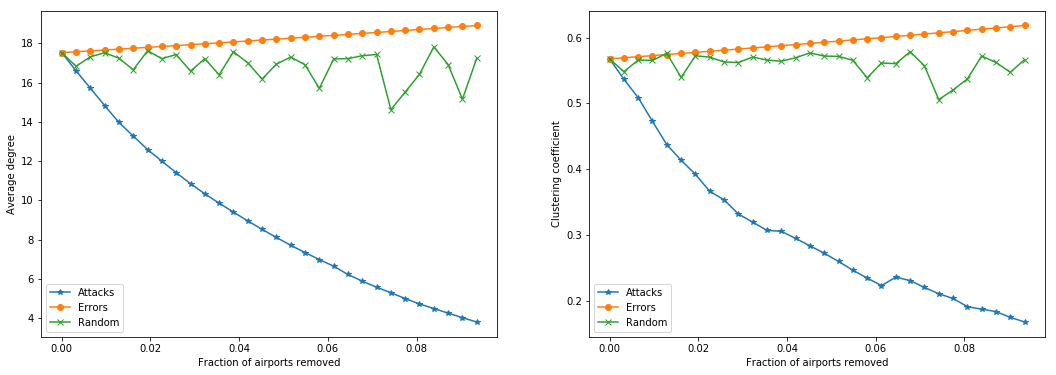

In [14]:
fig, ax = plt.subplots(figsize = (18,6))
plt.subplot(1,2,1)
plt.plot(plist, attack_effect["average_degree"], label = "Attacks", marker = "*")
plt.plot(plist, error_effect["average_degree"], label = "Errors", marker = "o")
plt.plot(plist, random_effect["average_degree"][0:30], label = "Random", marker = "x")
#plt.title("Effect of attacks and errors on network average degree")
plt.legend(loc = "lower left")
plt.xlabel("Fraction of airports removed")
plt.ylabel("Average degree")

plt.subplot(1,2,2)
plt.plot(plist, attack_effect["average_clustering"], label = "Attacks", marker = "*")
plt.plot(plist, error_effect["average_clustering"], label = "Errors", marker = "o")
plt.plot(plist, random_effect["average_clustering"][0:30], label = "Random", marker = "x")
#plt.title("Effect of attacks and errors on network clustering coefficient")
plt.legend(loc = "lower left")
plt.xlabel("Fraction of airports removed")
plt.ylabel("Clustering coefficient")

plt.savefig(fname = "Figures/attacksanderrors.png", format = "png", bbox_inches = "tight")

plt.show()